# <a>1. Import libraries and load data

In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import os

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat
import pylab

In [2]:
os.chdir(os.getcwd() + "\\Data")
os.listdir()

['HR-Attrition.csv', 'HRA DOCUMENT.docx']

In [3]:
hra_decision = pd.read_csv("HR-Attrition.csv", index_col = "EmployeeNumber")

In [4]:
df = hra_decision.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [6]:
for i in df:
    print(df[i].value_counts())

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     2

In [7]:
for i in df:
    if df[i].nunique() == 1:
        df.drop(i, axis = 1, inplace = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# <a>2. Handeling Categorical Features

In [8]:
df_ob = df.select_dtypes("object")
df_num = df.drop(df_ob, axis = 1)

for i in df_ob:
    print(i, df_ob[i].nunique())

Attrition 2
BusinessTravel 3
Department 3
EducationField 6
Gender 2
JobRole 9
MaritalStatus 3
OverTime 2


## <a>2.1 One Hot Encoding

In [9]:
df_HE = df_ob.copy()
for i in df_HE:
    if df[i].nunique() == 2:
        df_HE[i] = pd.get_dummies(df_HE[i], drop_first = True)

df_HE.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
EmployeeNumber,,,,,,,,
1,1,Travel_Rarely,Sales,Life Sciences,0,Sales Executive,Single,1
2,0,Travel_Frequently,Research & Development,Life Sciences,1,Research Scientist,Married,0
4,1,Travel_Rarely,Research & Development,Other,1,Laboratory Technician,Single,1
5,0,Travel_Frequently,Research & Development,Life Sciences,0,Research Scientist,Married,1
7,0,Travel_Rarely,Research & Development,Medical,1,Laboratory Technician,Married,0


## <a>2.3 Target Guided 

In [10]:
df_TG = df_ob.copy()
df_TG["Attrition"] = pd.get_dummies(df_TG["Attrition"], drop_first = True)
for i in df_TG.iloc[:,1:]:
    TG = df_TG.groupby([i])["Attrition"].mean().sort_values(ascending = False).index
    TG_dict = {k:i for i,k in enumerate(TG, 0)}
    df_TG[i] = df_TG[i].map(TG_dict)
df_TG

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
EmployeeNumber,,,,,,,,
1,1,1,0,3,1,3,0,0
2,0,0,2,3,0,4,1,1
4,1,1,2,5,0,1,0,0
5,0,0,2,3,1,4,1,0
7,0,1,2,4,0,1,1,1
...,...,...,...,...,...,...,...,...
2061,0,0,2,4,0,1,1,1
2062,0,1,2,4,0,6,1,1
2064,0,1,2,3,0,5,1,0


## <a>2.4 Mean Encoding 

In [11]:
df_ME = df_ob.copy()
df_ME["Attrition"] = pd.get_dummies(df_ME["Attrition"], drop_first = True)
for i in df_ME.iloc[:,1:]:
    ME = df_ME.groupby([i])["Attrition"].mean().to_dict()
    df_ME[i] = df_ME[i].map(ME)
df_ME.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
EmployeeNumber,,,,,,,,
1,1,0.149569,0.206278,0.146865,0.147959,0.174847,0.255319,0.305288
2,0,0.249097,0.138398,0.146865,0.170068,0.160959,0.124814,0.104364
4,1,0.149569,0.138398,0.134146,0.170068,0.239382,0.255319,0.305288
5,0,0.249097,0.138398,0.146865,0.147959,0.160959,0.124814,0.305288
7,0,0.149569,0.138398,0.135776,0.170068,0.239382,0.124814,0.104364


In [12]:
for i in df_ob:
    print(i, df_ob[i].nunique(), df_ME[i].nunique())

Attrition 2 2
BusinessTravel 3 3
Department 3 3
EducationField 6 6
Gender 2 2
JobRole 9 9
MaritalStatus 3 3
OverTime 2 2


## <a>2.5 Final Concatenation

In [13]:
df_TG["HRA"] = df_TG["Attrition"]
df_TG.drop("Attrition", axis = 1, inplace = True)
df_new = pd.concat([df_num, df_TG], axis = 1)
df_new.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,HRA
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,...,0,5,1,0,3,1,3,0,0,1
2,49,279,8,1,3,61,2,2,2,5130,...,1,7,0,2,3,0,4,1,1,0
4,37,1373,2,2,4,92,2,1,3,2090,...,0,0,1,2,5,0,1,0,0,1
5,33,1392,3,4,4,56,3,1,3,2909,...,3,0,0,2,3,1,4,1,0,0
7,27,591,2,1,1,40,3,1,2,3468,...,2,2,1,2,4,0,1,1,1,0


# <a>3. Outliers Treatment

In [14]:
df_out = df_new.copy()

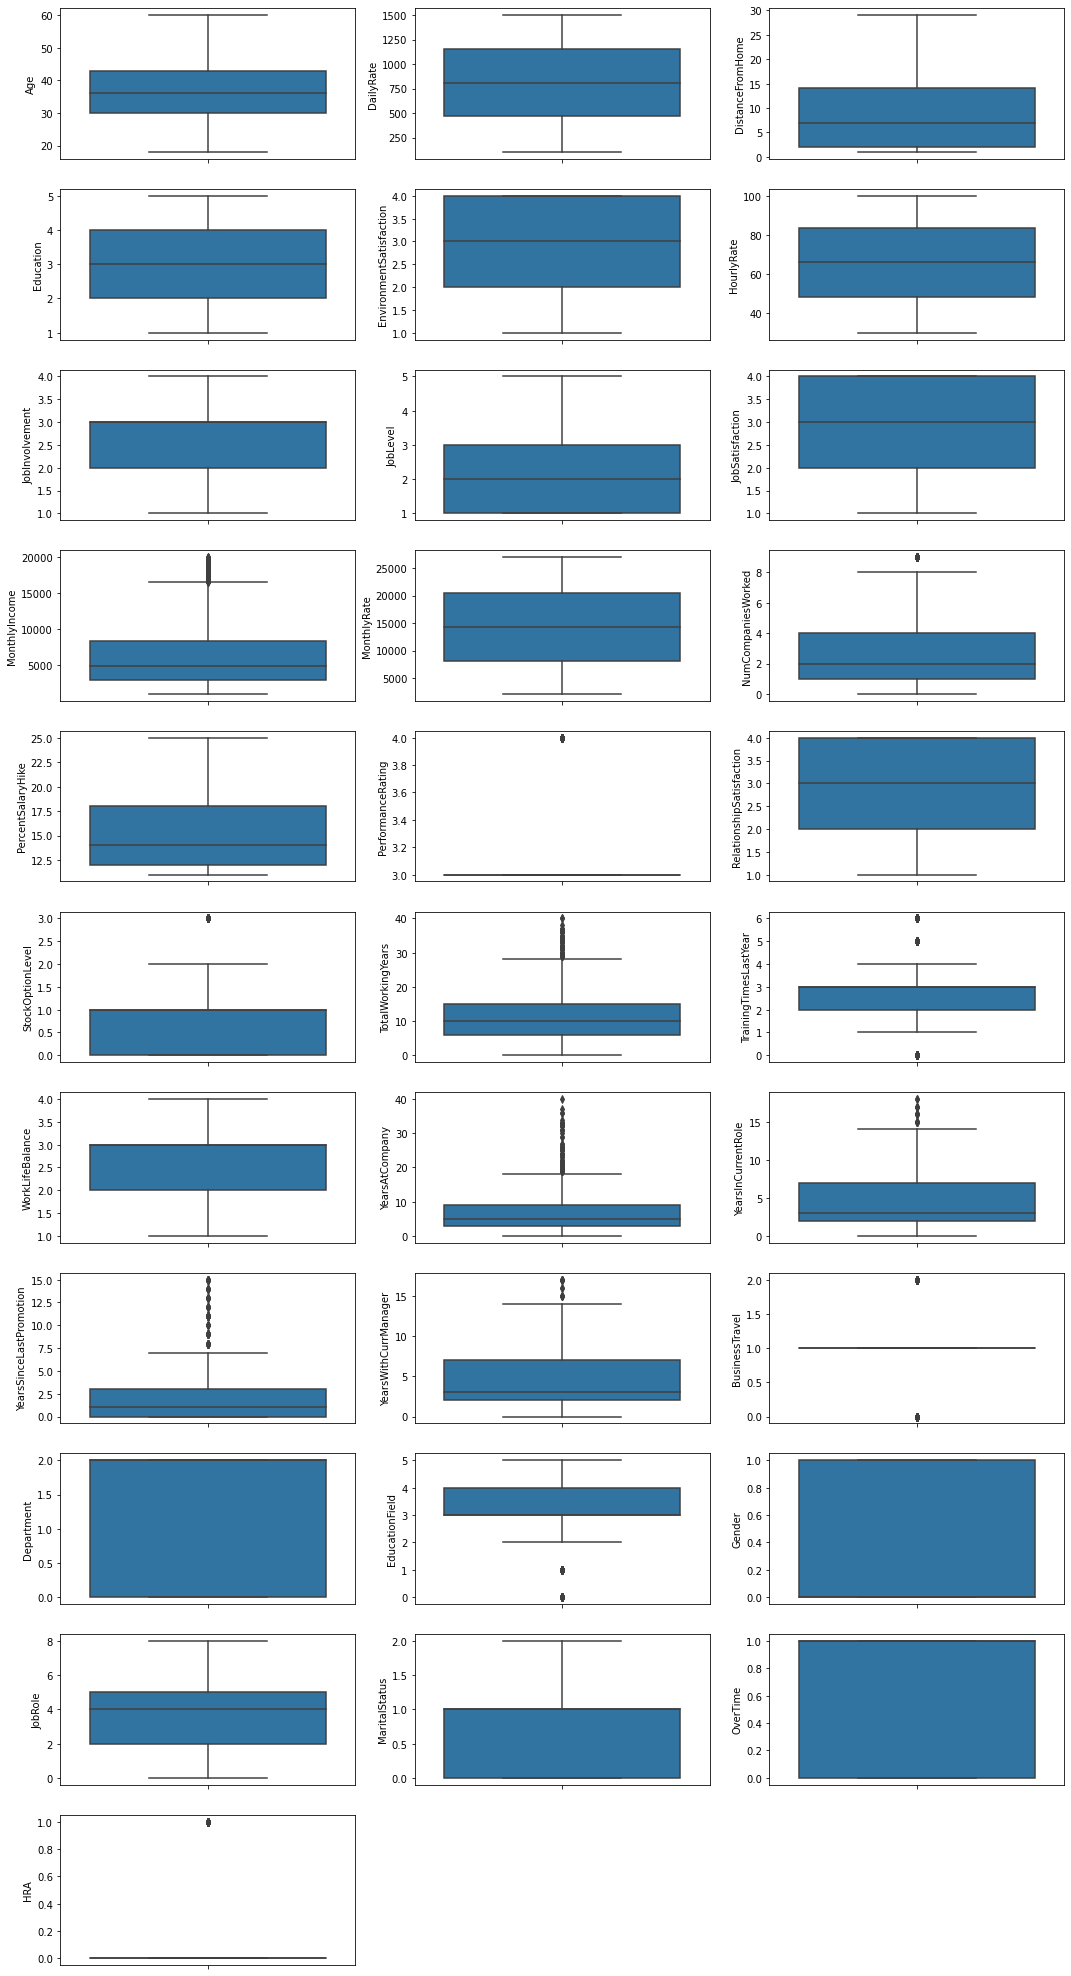

In [15]:
def distplot(data):
    plt.figure(figsize = (18,36))
    plotnumber = 1
    for i in data:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i, fontsize = 20)
        plotnumber += 1
    plt.show()

def QQplot(data):
    for i in data:
        plt.figure(figsize = (14,5))
        plt.subplot(1,2,1)
        data[i].hist()
        plt.subplot(1,2,2)
        stat.probplot(data[i],dist = 'norm',plot = pylab)
        plt.xlabel(i)
        plt.show()

def boxplot(data):
    plt.figure(figsize = (18,36))
    plotnumber = 1
    for i in data:
        ax = plt.subplot(11,3,plotnumber)
        sns.boxplot(y = data[i])
        plotnumber += 1
    plt.show()
boxplot(df_out)

In [16]:
df_out = df_out[["MonthlyIncome", 'NumCompaniesWorked', 'TrainingTimesLastYear', 'TotalWorkingYears', 
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
df_out

,MonthlyIncome,NumCompaniesWorked,TrainingTimesLastYear,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,
1,5993,8,0,8,6,4,0,5
2,5130,1,3,10,10,7,1,7
4,2090,6,3,7,0,0,0,0
5,2909,1,3,8,8,7,3,0
7,3468,9,3,6,2,2,2,2
...,...,...,...,...,...,...,...,...
2061,2571,4,3,17,5,2,0,3
2062,9991,4,5,9,7,7,1,7
2064,6142,1,0,6,6,2,0,3


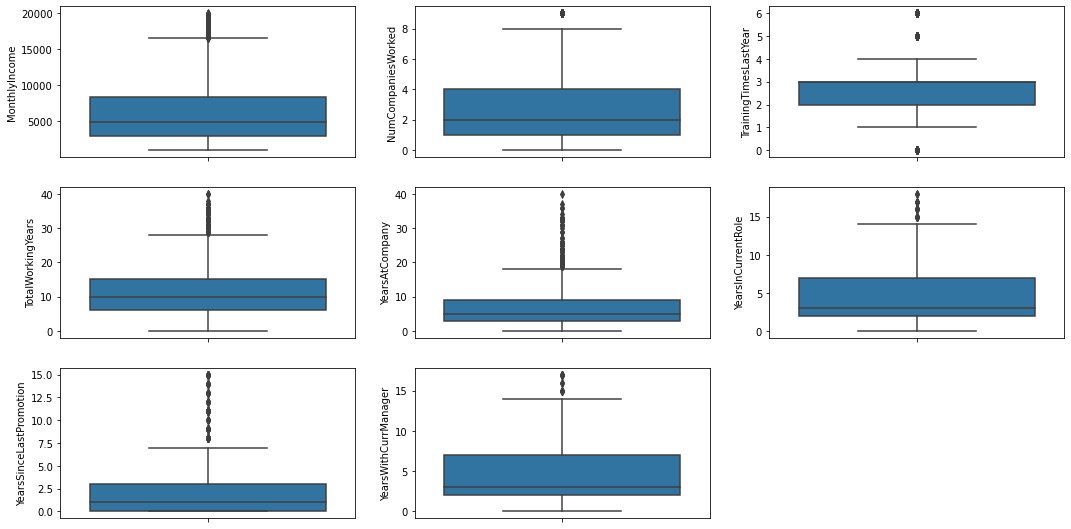

In [17]:
boxplot(df_out)

## <a>3.1 Quantile Method

In [18]:
df_QM = df_out.copy()

In [19]:
def outliers(data):
    lw = []
    ow = []
    for i in data.columns:
        q1,q3 = data[i].quantile([.25,.75])
        lo = q1-1.5*(q3-q1)
        uo = q3+1.5*(q3-q1)
        lw.append(lo)
        ow.append(uo)

    j = 0 
    for i in data:
        if j < len(lw):
            data.loc[data[i] <= lw[j],i] = lw[j]
            data.loc[data[i] >= ow[j],i] = ow[j]
        j += 1

    return(data)

df_QM = outliers(df_QM)

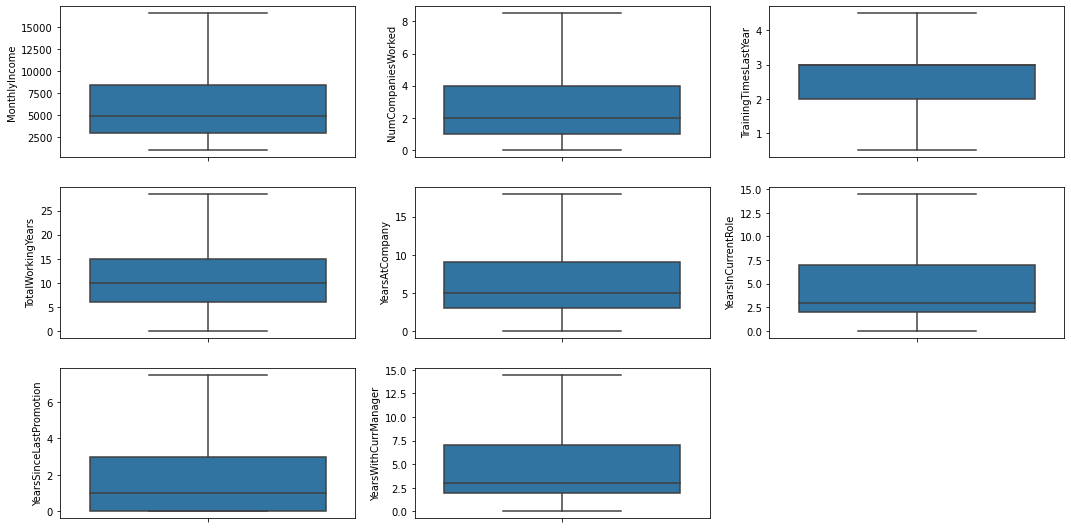

In [20]:
boxplot(df_QM)

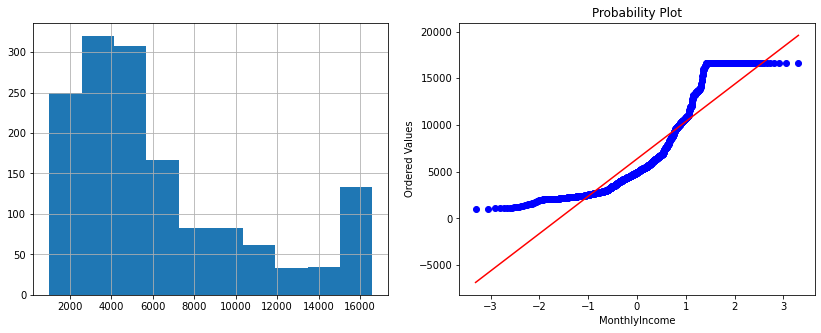

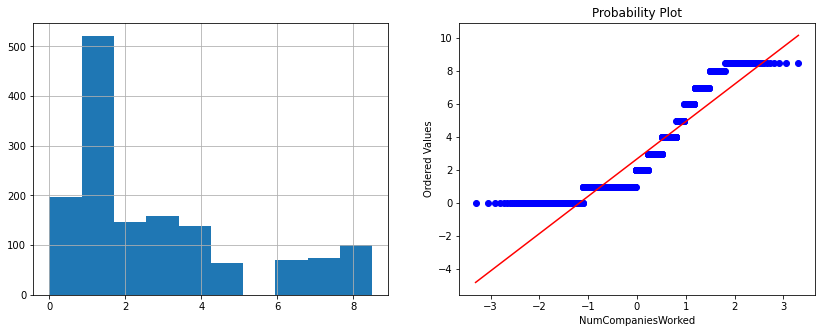

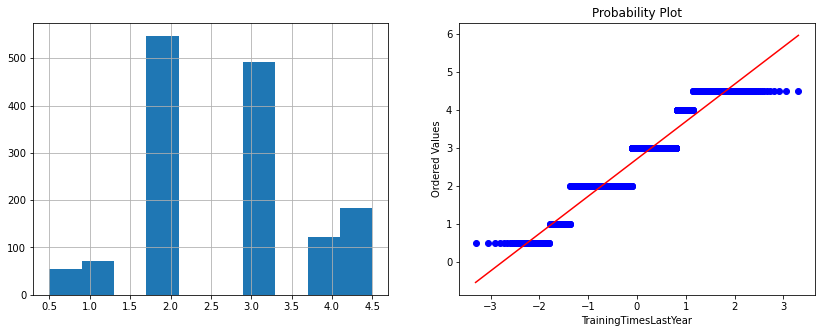

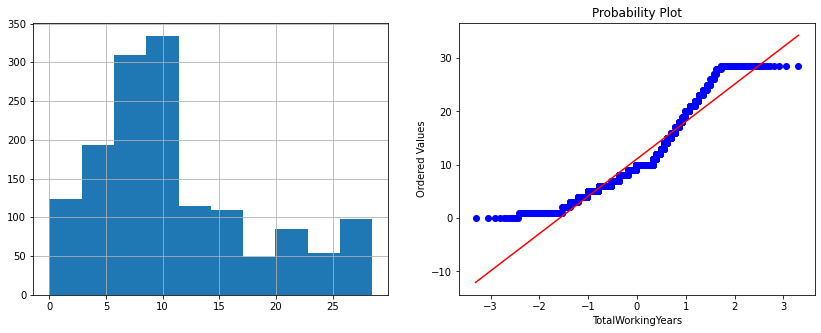

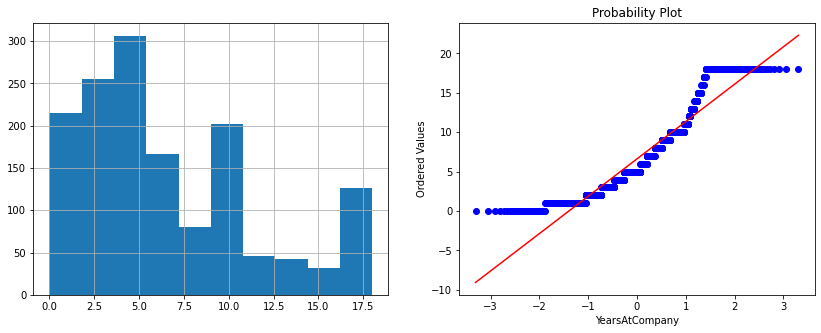

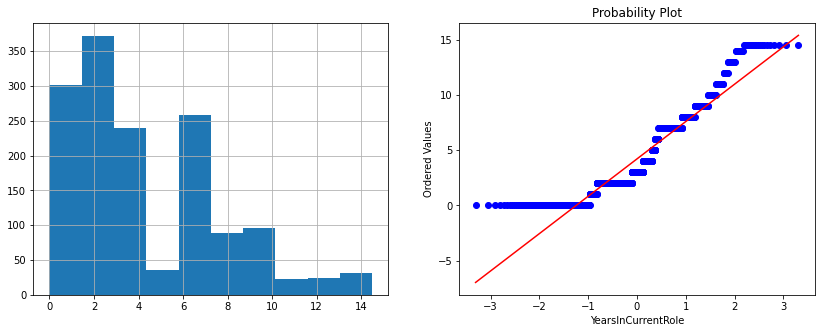

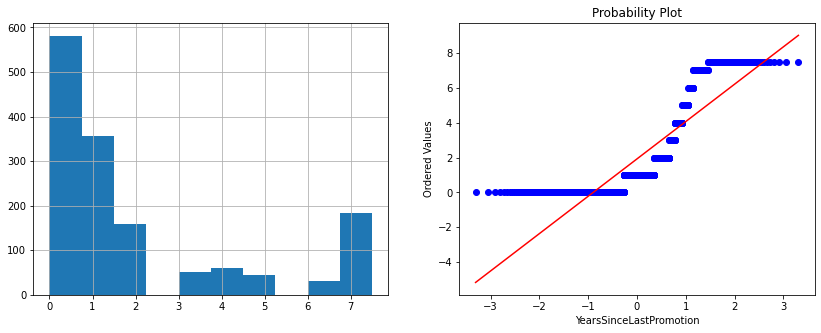

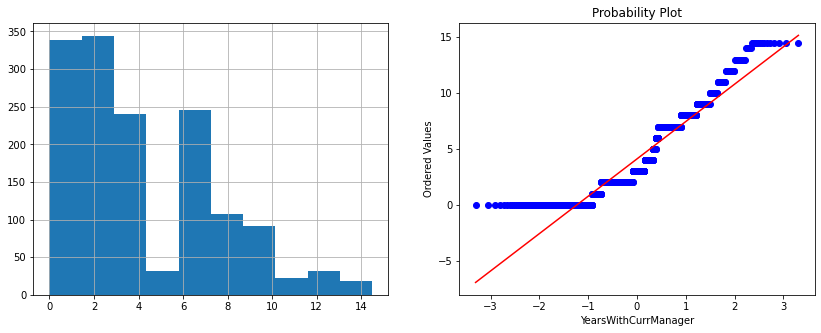

In [21]:
QQplot(df_QM)

## <a>3.2 3-Sigma Method

In [22]:
df_SM = df_out.copy()

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

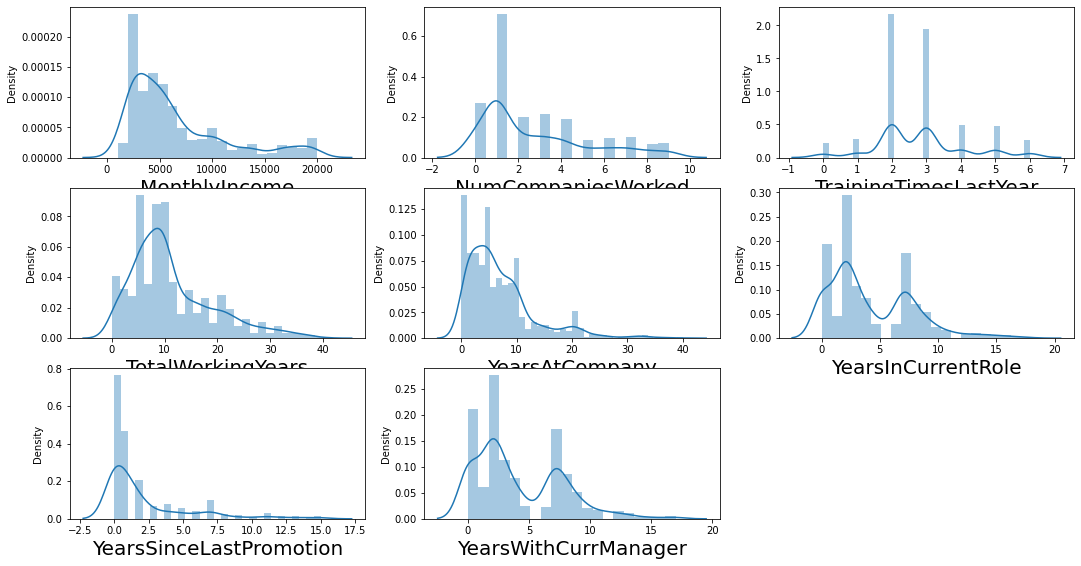

In [23]:
distplot(df_SM)

In [24]:
def sigma_outlier(data):
    min_sigma = []
    max_sigma = []
    for i in data:
        min_3sigma = data[i].mean() - 3*data[i].std()
        max_3sigma = data[i].mean() + 3*data[i].std()
        min_sigma.append(min_3sigma)
        max_sigma.append(max_3sigma)
       
    j=0
    for i in data:
        if j < len(min_sigma):
            data.loc[data[i] <= min_sigma[j],i] = min_sigma[j]
            data.loc[data[i] >= max_sigma[j],i] = max_sigma[j]
        j+=1

    return(data)
df_SM = sigma_outlier(df_SM)

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

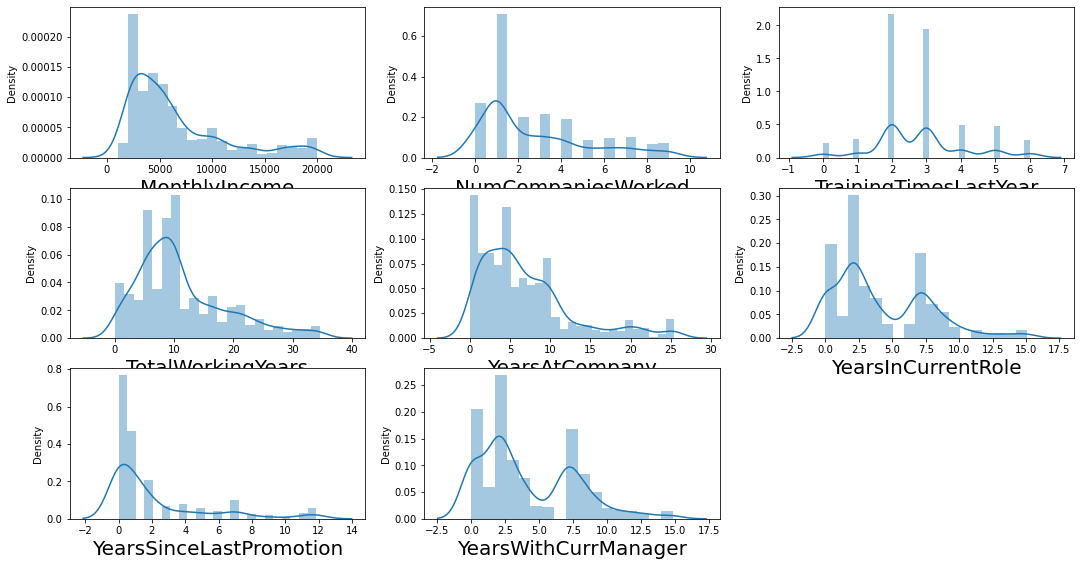

In [25]:
distplot(df_SM)

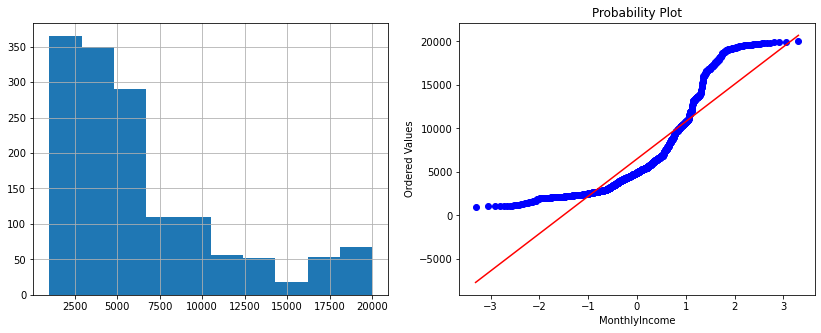

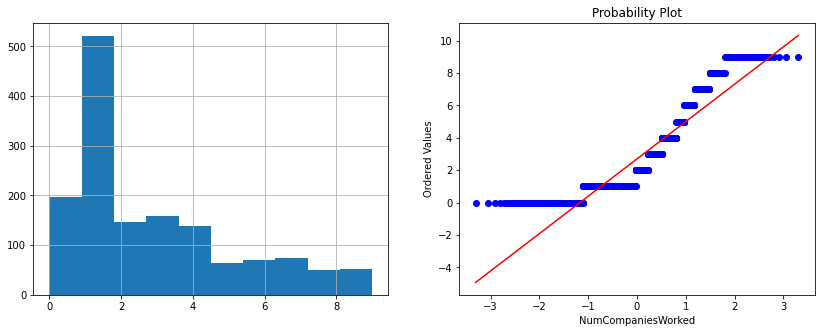

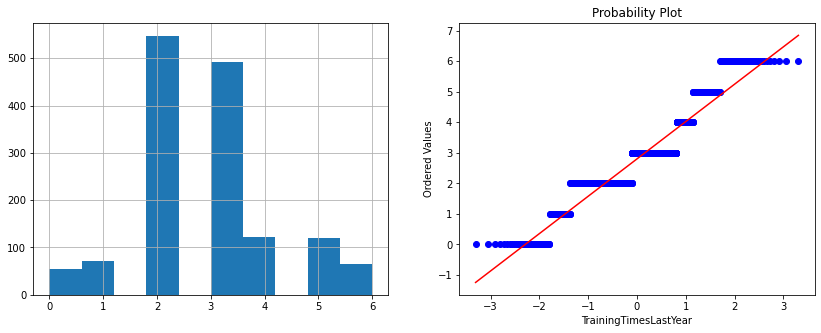

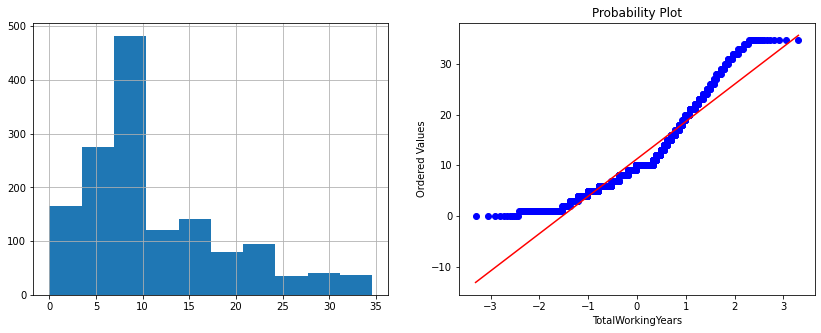

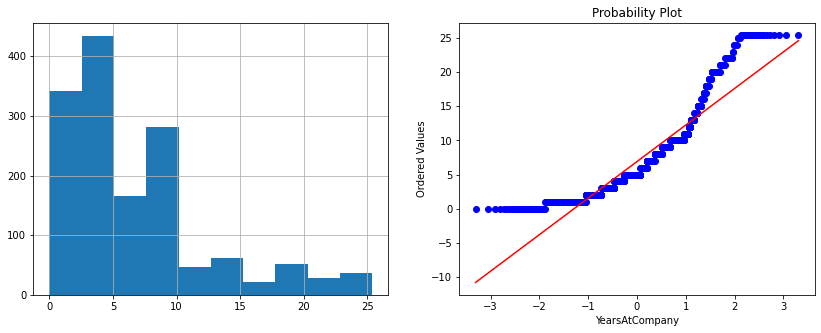

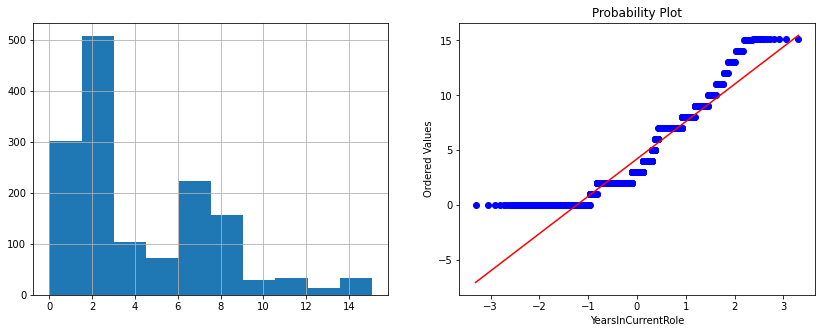

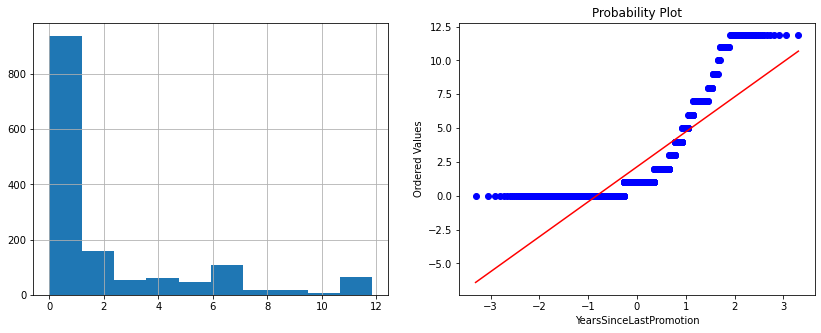

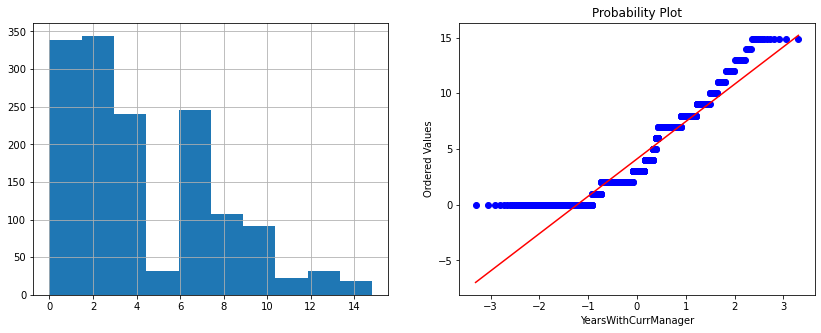

In [26]:
QQplot(df_SM)

## <a>3.3 Isolation Forest

In [27]:
from sklearn.ensemble import IsolationForest

In [28]:
df_IF = df_out.copy()

In [29]:
iso = IsolationForest(contamination = .1, n_estimators = 10000)
my_model = iso.fit(df_IF)
df_IF["outlier"] = my_model.predict(df_IF)
df_IF = df_IF.loc[df_IF["outlier"] == 1]

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

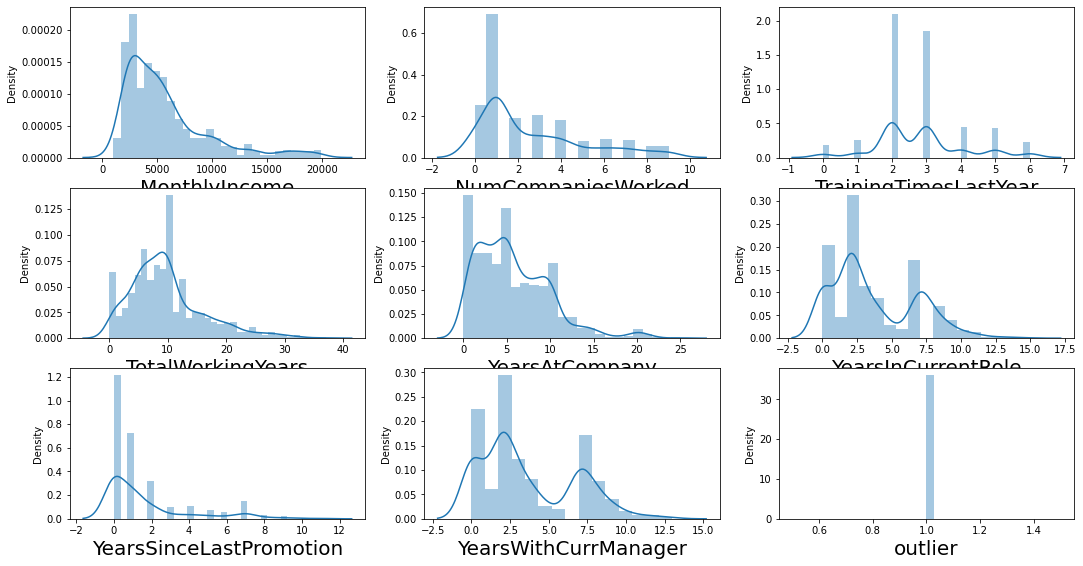

In [30]:
distplot(df_IF)

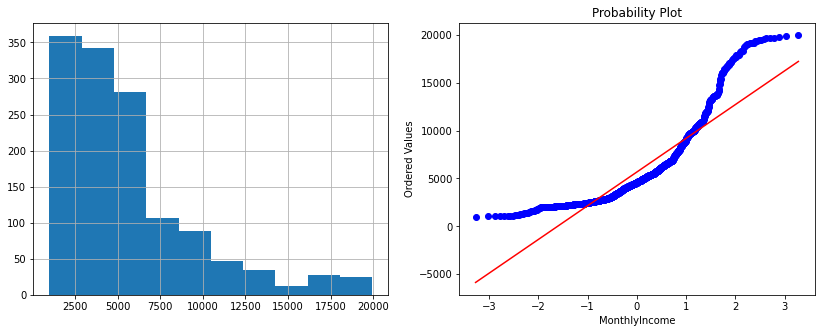

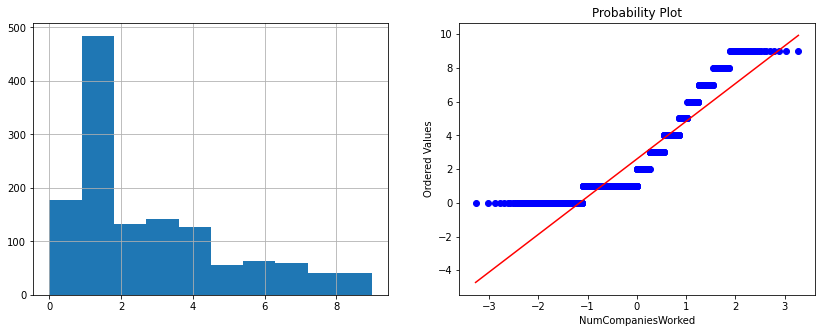

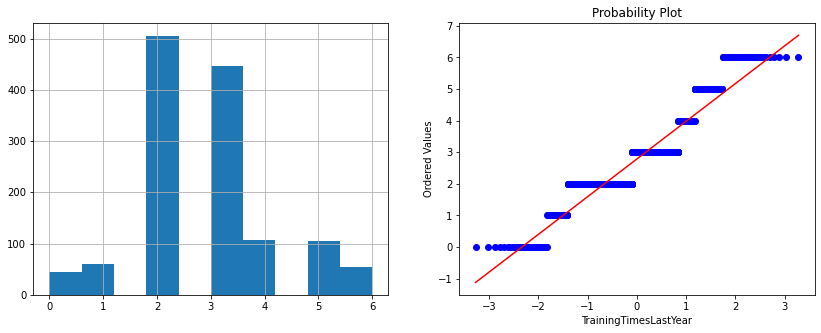

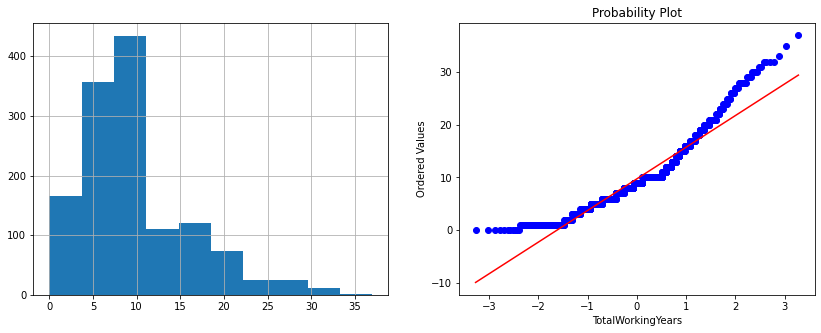

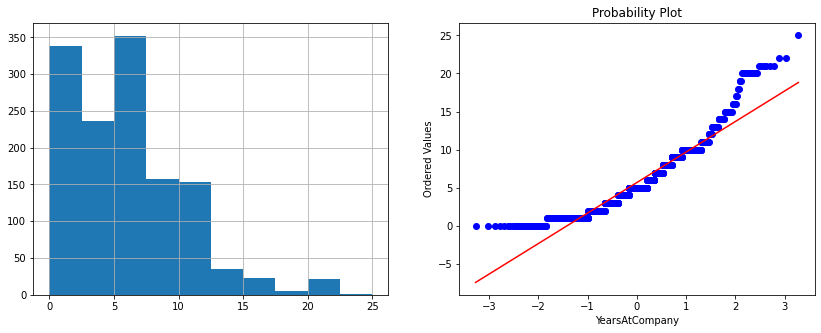

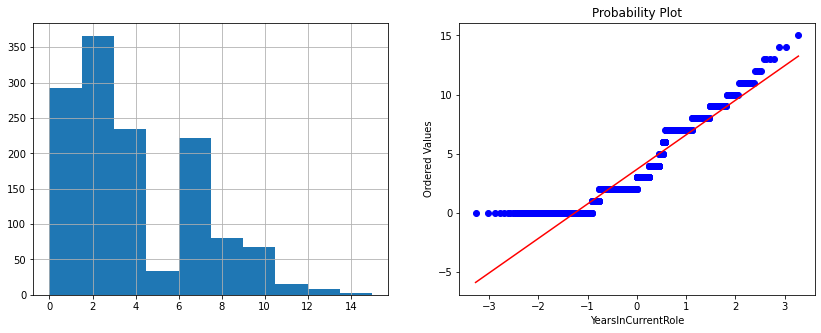

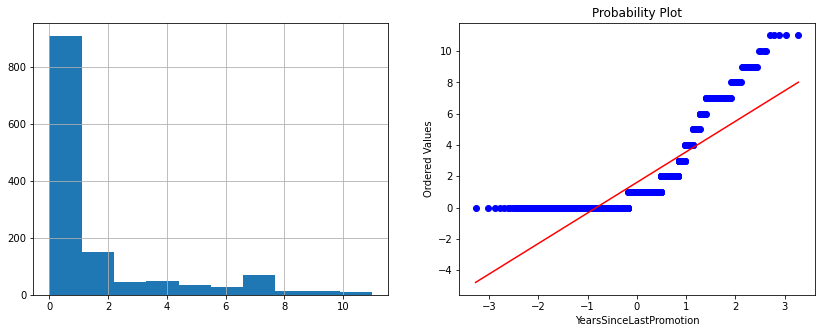

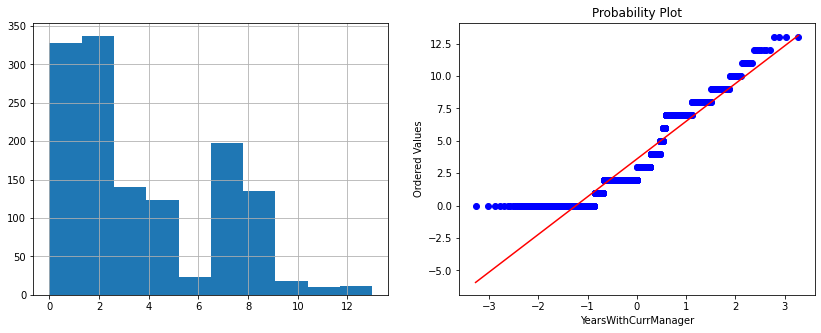

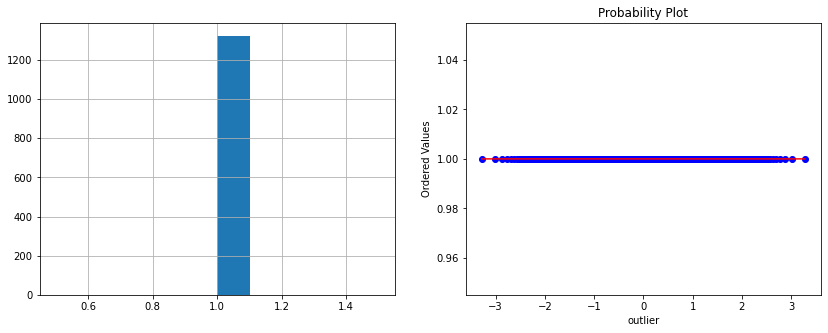

In [31]:
QQplot(df_IF)

In [32]:
df_new = pd.concat([df_SM[["TotalWorkingYears", "MonthlyIncome"]], df_IF.drop(["TotalWorkingYears", "MonthlyIncome",
         "outlier"], axis = 1), df_new.drop(df_out, axis = 1)], axis = 1)
df_new.head()

,TotalWorkingYears,MonthlyIncome,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DailyRate,...,StockOptionLevel,WorkLifeBalance,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,HRA
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,8.0,5993.0,8.0,0.0,6.0,4.0,0.0,5.0,41,1102,...,0,1,1,0,3,1,3,0,0,1
2,10.0,5130.0,1.0,3.0,10.0,7.0,1.0,7.0,49,279,...,1,3,0,2,3,0,4,1,1,0
4,7.0,2090.0,6.0,3.0,0.0,0.0,0.0,0.0,37,1373,...,0,3,1,2,5,0,1,0,0,1
5,8.0,2909.0,1.0,3.0,8.0,7.0,3.0,0.0,33,1392,...,0,3,0,2,3,1,4,1,0,0
7,6.0,3468.0,9.0,3.0,2.0,2.0,2.0,2.0,27,591,...,1,3,1,2,4,0,1,1,1,0


In [33]:
def skewness(df):
    sk=[]
    for i in df:
        sk1 = (df[i].mean() - df[i].mode())/df[i].std()
        sk.append(sk1)
        
    SK1 = pd.DataFrame(sk, columns = ["skewness"])
    
    j = 0
    for i in df.columns:
        if j < len(SK1):
            if SK1["skewness"][j] > .5:
                df[i] = df[i].fillna(df[i].median())
                
            elif SK1["skewness"][j] < -0.5:
                df[i] = df[i].fillna(df[i].median())
                
            else:
                df[i] = df[i].fillna(df[i].mean())
            j += 1

    return(df)
df_new = skewness(df_new)

In [34]:
df_new.isnull().sum()

TotalWorkingYears           0
MonthlyIncome               0
NumCompaniesWorked          0
TrainingTimesLastYear       0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyRate                 0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
WorkLifeBalance             0
BusinessTravel              0
Department                  0
EducationField              0
Gender                      0
JobRole                     0
MaritalStatus               0
OverTime                    0
HRA                         0
dtype: int64

# <a>4. Feature Selection

In [35]:
df_FS = df_new.copy()

In [36]:
X = df_FS.iloc[:,:-1]
y = df_FS["HRA"]

In [37]:
def barplot(data):
    plt.figure(figsize = (12,12))
    data.plot(kind = "bar")

## <a>4.1 Filter Method

In [38]:
def Filter(model):
    skb = SelectKBest(score_func = model)
    skb.fit(X,y)
    
    df_score = pd.DataFrame(skb.scores_, columns = ["score"], index = X.columns)
    df_score.sort_values(by = ["score"], ascending = False, inplace = True)
    return(df_score)

### <a>4.1.1 f_regression()

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [40]:
df_f_regression = Filter(f_regression)
df_f_regression

,score
OverTime,94.656457
JobRole,80.285263
YearsAtCompany,46.902511
TotalWorkingYears,45.818099
YearsInCurrentRole,44.796240
JobLevel,43.215344
MaritalStatus,39.599763
MonthlyIncome,38.488819
Age,38.175887
YearsWithCurrManager,37.333256


<Figure size 864x864 with 0 Axes>

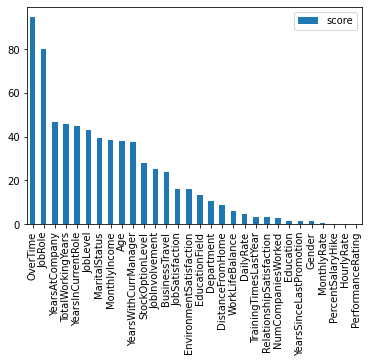

In [41]:
barplot(df_f_regression)

### <a>4.1.2 ANNOVA

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [43]:
df_annova = Filter(f_classif)
df_annova

,score
OverTime,94.656457
JobRole,80.285263
YearsAtCompany,46.902511
TotalWorkingYears,45.818099
YearsInCurrentRole,44.796240
JobLevel,43.215344
MaritalStatus,39.599763
MonthlyIncome,38.488819
Age,38.175887
YearsWithCurrManager,37.333256


### <a>4.1.3 Chi2

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2    

In [45]:
df_chi2 = Filter(chi2)
df_chi2

,score
MonthlyIncome,127922.293694
MonthlyRate,1196.633553
DailyRate,956.580494
TotalWorkingYears,234.684742
YearsAtCompany,125.500200
YearsInCurrentRole,100.606610
JobRole,97.669860
YearsWithCurrManager,85.898776
Age,84.155277
DistanceFromHome,63.772142


## <a>4.2 Wrapper Method (OLS Method)

In [46]:
import statsmodels.api as sm

In [47]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['NumCompaniesWorked', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


## <a>4.3 Embedded Method

### <a>4.3.1 Extra Tree Classifier

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

In [49]:
etc = ExtraTreesClassifier(n_estimators = 500)
etc.fit(X,y)
score_ETC = pd.DataFrame(etc.feature_importances_*100, index = X.columns, columns = ["ETC_score"])
score_ETC.sort_values(by = "ETC_score", ascending = False, inplace = True)
score_ETC

,ETC_score
OverTime,6.886432
JobRole,4.404370
Age,4.201006
MonthlyIncome,4.008747
TotalWorkingYears,3.958667
EnvironmentSatisfaction,3.895905
JobSatisfaction,3.619458
DistanceFromHome,3.541136
WorkLifeBalance,3.504305
MaritalStatus,3.392392


<Figure size 864x864 with 0 Axes>

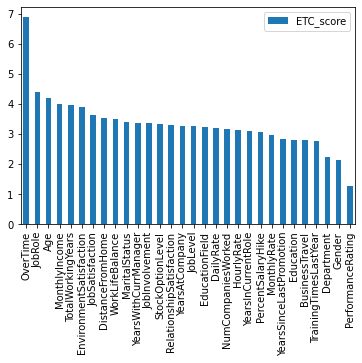

In [50]:
barplot(score_ETC)

### <a>4.3.2 Lasso Method

In [51]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel

In [52]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.276635
Best score using built-in LassoCV: 0.028976


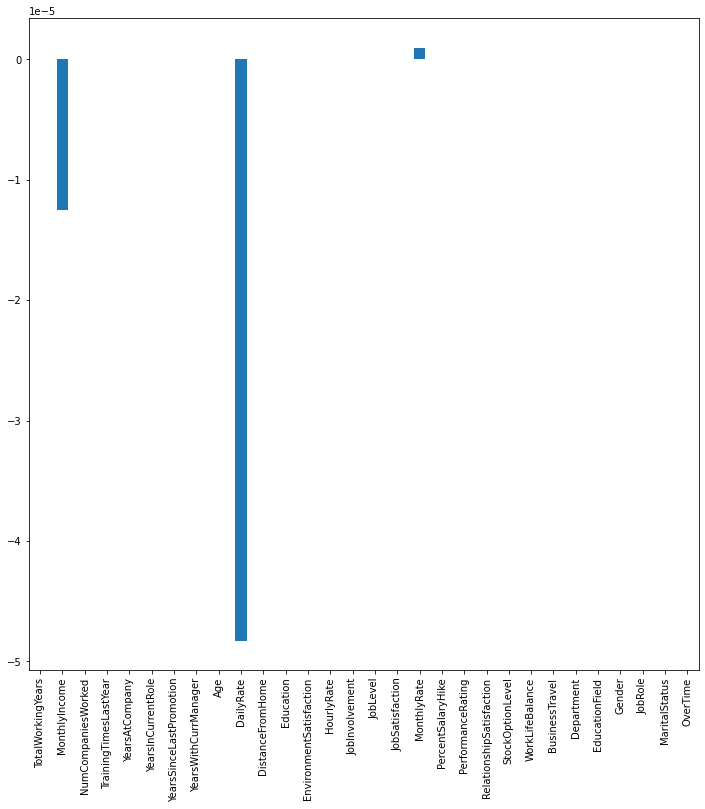

In [53]:
barplot(coef)

In [54]:
ls = SelectFromModel(Lasso(alpha = 2.24, random_state = 0))
ls.fit(X,y)
ls.get_support()

selected_features = X.columns[(ls.get_support())]
selected_features

Index(['MonthlyIncome', 'DailyRate'], dtype='object')

## <a>4.4 Features Selected

In [55]:
df_new = df_new[["OverTime", "JobRole", "Age", "MonthlyIncome", "TotalWorkingYears", "EnvironmentSatisfaction", 
        "DistanceFromHome", "JobSatisfaction", "HRA"]]
df_new.head()

,OverTime,JobRole,Age,MonthlyIncome,TotalWorkingYears,EnvironmentSatisfaction,DistanceFromHome,JobSatisfaction,HRA
EmployeeNumber,,,,,,,,,
1,0,3,41,5993.0,8.0,2,1,4,1
2,1,4,49,5130.0,10.0,3,8,2,0
4,0,1,37,2090.0,7.0,4,2,3,1
5,0,4,33,2909.0,8.0,4,3,3,0
7,1,1,27,3468.0,6.0,1,2,2,0


# <a>5. Standardization

In [57]:
X = df_new.drop("HRA", axis = 1)
y = df_new["HRA"]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

best_model = scaler.fit_transform(X)

best_model = pd.DataFrame(best_model,columns = X.columns)

# <a>6. Logistic Regression

In [58]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(best_model, y, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model = lr.fit(x_train,y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       310
           1       0.88      0.24      0.38        58

    accuracy                           0.88       368
   macro avg       0.88      0.62      0.65       368
weighted avg       0.88      0.88      0.84       368

[[308   2]
 [ 44  14]]
